In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
lam = 0.3 #lambda
mu = 0.3 #mu
rho = 0.1 #discount factor
cost_a = 0.1 #attacking cost
cost_b = 0.2 #defending cost
theta = 0.01 #converge threshold
maxLength = 40

In [4]:
value = np.zeros([maxLength+1, maxLength+1])
# print(value)
policy_a = np.zeros([maxLength+1, maxLength+1])
policy_b = np.zeros([maxLength+1, maxLength+1])
policy_type = np.zeros([maxLength+1, maxLength+1])
while True:
    delta = 0
    for x in range(maxLength):
        for y in range(maxLength):
            v = value[x][y]
            d = lam*abs(value[x+1][y]-value[x][y+1])
            val = x+y+mu*(value[max(0,x-1)][y]+value[x][max(0,y-1)])+lam*min(value[x+1][y],value[x][y+1])
            if d < cost_a:
                value[x][y] = val
            else:
                if d < cost_b:
                    value[x][y] = val+d-cost_a
                else:
                    value[x][y] = val+cost_b*(1-cost_a/d)
            delta = max(delta, abs(v-value[x][y]))
#     print(delta)
    if delta<theta:
        break
for x in range(maxLength):
    for y in range(maxLength):
        d = lam*abs(value[x+1][y]-value[x][y+1])
        if d < cost_a:
            policy_a[x][y] = 0
            policy_b[x][y] = 0
            policy_type[x][y] = 0
        else:
            if d < cost_b:
                policy_a[x][y] = 1
                policy_b[x][y] = 0
                policy_type[x][y] = 1
            else:
                policy_a[x][y] = cost_b/d
                policy_b[x][y] = 1-cost_a/d
                policy_type[x][y] = 2

Text(0, 0.5, 'length of queue 2')

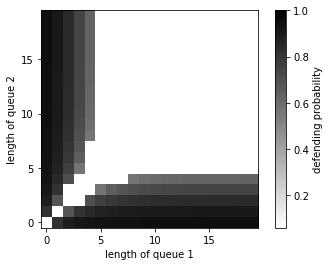

In [5]:
# Z is your data set
N = int(maxLength/2)
B = policy_b[:N,:N]

# G is a NxNx3 matrix
G = np.zeros((N,N,3))

# Where we set the RGB for each pixel
# G[T == 0] = [1,0,0]
# G[T == 1] = [0,1,0]
# G[T == 2] = [0,0,1]

for i in range(N):
    for j in range(N):
        b_ij = B[i][j]
        G[i][j] = [1-b_ij,1-b_ij,1-b_ij]


plt.imshow(G,interpolation='nearest',cmap='gray_r')
plt.gca().invert_yaxis()
plt.colorbar(label="defending probability", orientation="vertical")
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.xlabel('length of queue 1')
plt.ylabel('length of queue 2')

Text(0, 0.5, 'length of queue 2')

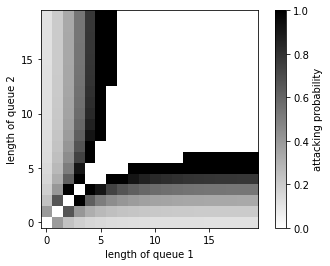

In [6]:
# Z is your data set
N = int(maxLength/2)
A = policy_a[:N,:N]

# G is a NxNx3 matrix
G = np.zeros((N,N,3))


for i in range(N):
    for j in range(N):
        a_ij = A[i][j]
        G[i][j] = [1-a_ij,1-a_ij,1-a_ij]


plt.imshow(G,interpolation='nearest',cmap='gray_r')
plt.gca().invert_yaxis()
plt.colorbar(label="attacking probability", orientation="vertical")
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.xlabel('length of queue 1')
plt.ylabel('length of queue 2')

Text(10, 1.6, 'high risk')

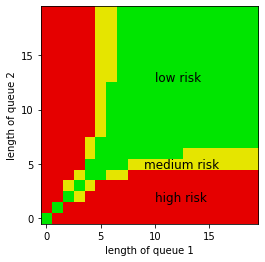

In [7]:
# Z is your data set
N = int(maxLength/2)
T = policy_type[:N,:N]

# G is a NxNx3 matrix
G = np.zeros((N,N,3))

# Where we set the RGB for each pixel
G[T == 0] = [0,0.9,0]
G[T == 1] = [0.9,0.9,0]
G[T == 2] = [0.9,0,0]


plt.imshow(G,interpolation='nearest')
plt.gca().invert_yaxis()
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.xlabel('length of queue 1')
plt.ylabel('length of queue 2')
plt.text(10, 12.6, "low risk", size=12)
plt.text(9, 4.6, "medium risk", size=12)
plt.text(10, 1.6, "high risk", size=12)